In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import jieba

%matplotlib inline
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',50)
tqdm.pandas('demo')

In [2]:
!wc -l ./data/*

     7001 ./data/labeled_data.csv
    20001 ./data/submit_example.csv
    20001 ./data/test_data.csv
   185129 ./data/train.zip
    33001 ./data/unlabeled_data.csv
     2001 ./data/家居_binary_data.csv
     2001 ./data/房产_binary_data.csv
     2001 ./data/教育_binary_data.csv
     2001 ./data/时尚_binary_data.csv
     2001 ./data/时政_binary_data.csv
     2001 ./data/科技_binary_data.csv
     2001 ./data/财经_binary_data.csv
   279140 total


In [7]:
!ls ./resources/

zh_stopwords.txt


In [49]:
stopwords = set()
with open('./resources/zh_stopwords.txt', 'r') as fr:
    for line in fr.readlines():
        stopwords.add(line.strip())

In [23]:
train_df = pd.read_csv('./data/labeled_data.csv')
test_df = pd.read_csv('./data/test_data.csv')
unlabeld_df = pd.read_csv('./data/unlabeled_data.csv')

In [24]:
label2id = {'时政': 0, '房产': 1, '财经': 2, '科技': 3, '时尚': 4, '教育': 5, '家居': 6}

In [25]:
train_df.head()

,id,class_label,content
0,0,时政,韩美决定每年在黄海举行反潜联合军演(图)中新网10月19日电 据韩国《朝鲜日报》网站19日报...
1,1,房产,王鹏：商业地产重要的三个环节董利：刚才蔡总介绍了一下台湾的便利店，其实便利店在改变着人们的生...
2,2,房产,碧桂园股份掉期亏损净利降66%料今年销售额达190亿 杨国强对楼市表示“审慎乐观” 东方早报...
3,3,房产,刘新虎：关于丽泽商务区的定位问题【刘新虎】：主要是为了学习，因为以前在丰台区开发过项目，20...
4,4,财经,回顾2010年的邮市：各品种多版块都很给力老票精品很给力。2010年的春天，老票精品吹响了邮...


In [26]:
unlabeld_df.head()

,id,content
0,0,媒体人看自费留学：《大河报》辛渐1、 留学是否应该找“中介”？留学是一件相当复杂，政策性、法...
1,1,G联赛2011第二赛季信息 报名方式公布游我所爱，任我风云。上海文广互动电视有限公司(SiT...
2,2,基金创新年年讲 创新产品年年缺每经记者 巩万龙 发自深圳目前，国内基金产品严重同质化。面对相...
3,3,火箭晚节不保三连胜终止 兰多夫29分19板拯救灰熊新浪体育讯北京时间1月22日，火箭在客场以...
4,4,中石油突陷购房门：20亿团购房开发商半卖半送中石化“天价吊灯”引起的风波刚刚过去一个月，中石...


In [50]:
domain_wordcounts = {}
for row in train_df.itertuples():
    if row.class_label not in domain_wordcounts:
        domain_wordcounts[row.class_label] = {}
    for w in jieba.cut(row.content):
        if w in stopwords or len(w) == 1:
            continue
        if w.isdigit():
            continue
        if w[0] in '1234567890':
            continue
        if w not in domain_wordcounts[row.class_label]:
            domain_wordcounts[row.class_label][w] = 1
        else:
            domain_wordcounts[row.class_label][w] += 1
domain_wordcounts_filtered = {}
for k , v in domain_wordcounts.items():
    domain_wordcounts_filtered[k] = {}
    threshold = 500
    if k == '家居':
        threshold = 50
    elif k == '时尚':
        threshold = 100
    elif k == '时政':
        threshold = 200
    for w,cnt in v.items():
        if cnt >= threshold:
            domain_wordcounts_filtered[k][w] = cnt

In [62]:
domain_wordcounts_filtered
# sorted([[k,v] for k,v in domain_wordcounts['家居'].items()], key=lambda x : x[1], reverse=True )

{'家居': {'个性': 68,
  '中式': 68,
  '主人': 99,
  '乡村': 61,
  '书房': 70,
  '享受': 83,
  '企业': 60,
  '优雅': 81,
  '传统': 70,
  '住宅': 57,
  '使用': 117,
  '元素': 74,
  '充满': 79,
  '具有': 55,
  '创意': 56,
  '利用': 55,
  '别墅': 51,
  '功能': 67,
  '卧室': 217,
  '卫浴': 58,
  '卫生间': 78,
  '厨房': 194,
  '变得': 64,
  '古典': 95,
  '可爱': 61,
  '同样': 51,
  '喜欢': 125,
  '图案': 120,
  '地方': 80,
  '地板': 58,
  '地毯': 53,
  '墙壁': 85,
  '墙面': 100,
  '壁纸': 95,
  '孩子': 58,
  '完美': 76,
  '客厅': 303,
  '室内': 65,
  '家中': 75,
  '家具': 258,
  '家居': 218,
  '家庭': 64,
  '家电': 75,
  '家里': 90,
  '居室': 67,
  '布置': 64,
  '庭院': 52,
  '建筑': 50,
  '房子': 100,
  '房间': 136,
  '打造': 55,
  '搭配': 191,
  '摆放': 61,
  '收纳': 75,
  '改造': 53,
  '效果': 98,
  '整体': 63,
  '时尚': 120,
  '显得': 61,
  '更加': 66,
  '最好': 83,
  '材料': 79,
  '材质': 56,
  '植物': 56,
  '沙发': 187,
  '浪漫': 111,
  '温馨': 76,
  '现代': 136,
  '玻璃': 67,
  '生活': 181,
  '田园': 75,
  '白色': 159,
  '睡眠': 60,
  '空间': 490,
  '窗帘': 70,
  '简单': 101,
  '简约': 61,
  '精致': 55,
  '线条': 58,
  '组图': 211,
  '细节': 53,


In [66]:
def score_by_domain(content, domain):
    score = 0
    for w in jieba.cut(content):
        if w in domain:
            score += 1
    return score


In [67]:
train_df['家居'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['家居'] ), axis=1)
train_df['房产'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['房产'] ), axis=1)
train_df['教育'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['教育'] ), axis=1)
train_df['时尚'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['时尚'] ), axis=1)
train_df['时政'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['时政'] ), axis=1)
train_df['科技'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['科技'] ), axis=1)
train_df['财经'] = train_df.progress_apply(lambda x: score_by_domain(x.content,domain_wordcounts_filtered['财经'] ), axis=1)


100%|██████████| 7000/7000 [00:52<00:00, 132.28it/s]


In [68]:
train_df

,id,class_label,content,家居,房产,教育,时尚,时政,科技,财经
0,0,时政,韩美决定每年在黄海举行反潜联合军演(图)中新网10月19日电 据韩国《朝鲜日报》网站19日报...,1,5,2,2,36,6,2
1,1,房产,王鹏：商业地产重要的三个环节董利：刚才蔡总介绍了一下台湾的便利店，其实便利店在改变着人们的生...,6,84,7,29,21,5,21
2,2,房产,碧桂园股份掉期亏损净利降66%料今年销售额达190亿 杨国强对楼市表示“审慎乐观” 东方早报...,3,36,6,15,26,5,28
3,3,房产,刘新虎：关于丽泽商务区的定位问题【刘新虎】：主要是为了学习，因为以前在丰台区开发过项目，20...,14,107,16,29,44,16,42
4,4,财经,回顾2010年的邮市：各品种多版块都很给力老票精品很给力。2010年的春天，老票精品吹响了邮...,7,80,5,77,12,2,99
...,...,...,...,...,...,...,...,...,...,...
6995,6995,科技,英媒刊登照片展示全球正在消融的冰川(图)新浪科技讯 北京时间4月30日消息，据英国《卫报》报...,5,16,10,22,18,22,3
6996,6996,时尚,搭配QA：厚厚羽绒服怎么穿出流行感Q：冬天不得不穿上厚厚的羽绒服御寒，可以大部分羽绒服设计都...,8,1,0,20,0,0,0
6997,6997,家居,加以零星别致的摆设(图)快乐来临时，一切都是美好的，清新的色调，加以零星别致的摆设，体现出充...,1,0,0,0,0,0,0
6998,6998,时政,基地组织训练5岁娃娃兵练习射击充当人弹(图)中新网7月11日电 据英国媒体10日报道，英国一...,7,3,7,1,14,7,3


In [72]:
total, right = 0., 0.
for row in train_df.itertuples():
    pred = [('家居',row.家居), 
            ('房产',row.房产), 
            ('教育',row.教育), 
            ('时尚',row.时尚), 
            ('时政',row.时政), 
            ('科技',row.科技), 
            ('财经',row.财经)]
    p = sorted(pred, key=lambda x: x[1], reverse=True)[0][0]
    if p==row.class_label:
        right += 1
    else:
        print(row.content)
        print(row.class_label)
        print(p)
        print(pred)
        print('###############################')
    
    total += 1
print(right/total)

集成电路50年变迁：更快更小更低廉(组图)在近50年的时间里，集成电路已经广泛应用于工业、军事、通讯和遥控等各个领域。用集成电路来装配电子设备，其装配密度相比晶体管可以提高几十倍至几千倍，设备的稳定工作时间也可以大大提高。以下为集成电路50年来的简要发展和应用情况：1、第一块集成电路板第一块集成电路板几根零乱的电线将五个电子元件连接在一起，就形成了历史上第一个集成电路。虽然它看起来并不美观，但事实证明，其工作效能要比使用离散的部件要高得多。历史上第一个集成电路出自杰克-基尔比之手。当时，晶体管的发明弥补了电子管的不足，但工程师们很快又遇到了新的麻烦。为了制作和使用电子电路，工程师不得不亲自手工组装和连接各种分立元件，如晶体管、二极管、电容器等。很明显，这种做法是不切实际的。于是，基尔比提出了集成电路的设计方案。2、半导体设备与铅结构模型半导体设备与铅结构模型其实，在20世纪50年代，许多工程师都想到了这种集成电路的概念。美国仙童公司联合创始人罗伯特-诺伊斯就是其中之一。在基尔比研制出第一块可使用的集成电路后，诺伊斯提出了一种“半导体设备与铅结构”模型。1960年，仙童公司制造出第一块可以实际使用的单片集成电路。诺伊斯的方案最终成为集成电路大规模生产中的实用技术。基尔比和诺伊斯都被授予“美国国家科学奖章”。他们被公认为集成电路共同发明者。3、分子电子计算机分子电子计算机虽然集成电路优点明显，但仍然有很长时间没有在工业部门得到实际应用。相反，它却首先引起了军事及政府部门的兴趣。1961年，德州仪器为美国空军研发出第一个基于集成电路的计算机，即所谓的“分子电子计算机”。美国宇航局也开始对该技术表示了极大兴趣。当时，“阿波罗导航计算机”和“星际监视探测器”都采用了集成电路技术。
科技
时政
[('家居', 6), ('房产', 6), ('教育', 5), ('时尚', 9), ('时政', 10), ('科技', 5), ('财经', 2)]
###############################
出国留学理财常见问题：学费生活费怎样支付3、学费、生活费用何种方式支付更合理？答：学费可以选择电汇、票汇、国际双币卡的方式支付外，还可以由学生携带现金或旅行支票至当地支付。生活费可用现金、旅行支票直接支付，或者选择国际信用卡、借记卡刷卡消费。
教育
财经
[('家居',

科技
时政
[('家居', 2), ('房产', 7), ('教育', 1), ('时尚', 5), ('时政', 8), ('科技', 7), ('财经', 2)]
###############################
12个真实提醒：让你在美国生活的更好1. Two for three dollars。很多人第一次来到美国的超市买东西都会有同样的疑问， 它上面写着 Two for three dollars 那倒底可不可以只买一个呢？ 答案是可以的. 买一个会不会比较贵呢？ 其实一点也不会， 如果 Two for three dollars 那么买一个就是一块半啦. 但是在快餐店的情况又不同了， 像麦当劳或 Arby 常会有一些促销活动， 如 Arby 的 2 Sub for 4 dollars, 这种情况就不能单买一个。2. Buy one get on free。这是美国常见的一种促销手法， 小至日常用品， 大至汽车都有 buy one get one free 的优待. 但是由于是买一送一， 所以拿二个跟拿一个的价钱是一样的， 这跟上面所说的 Two for three dollars 是不一样的。3. Never buying beers without your pictured ID in hand。美国的法律规定， 凡是买酒精类的产品都是要看 picture ID 的. (要达到法定年龄才能买酒) 而且各州甚至各郡的规定都不同. 有些地方是可以卖 Liquor 的， 有些地方则不行. 有些州有些很奇怪的规定， 像是 Georgia , 规定星期日不得卖酒， (怎么会有这种奇怪的规定) 我第一次不知道， 星期日高高兴兴准备要去买了一箱啤酒准备去开 party, 结果柜台人员居然不卖给我， 还跟我说， Don't you know that? It's law!4. Bring your I.D to the bar, movies and when you write a check。一般跳舞的酒吧都有年龄的限制， 有些规定是 18 岁， 有些规定要 21 岁. 像 18 岁的地方， 如果你年纪超过 21 岁， 他会发给你一个手环 (bracelet)， 这表示你可以在里面买酒. 至于电影有些戏院会把普通级和限制级电影分区， 没有 I.D 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [61]:
train_df['content'][0]

'韩美决定每年在黄海举行反潜联合军演(图)中新网10月19日电 据韩国《朝鲜日报》网站19日报道，韩美两国决定，从明年起每年将分别在日本海(韩国称东海)和黄海(韩国称西海)进行两次反潜联合军演。另外，截止2018年，韩国还将再度建造一艘类似独岛舰的1.45万吨级大型登陆舰，此舰可在6个月内被改造成轻型航母。据报道，当地时间18日，韩国海军总参谋长金圣赞在京畿道平泽独岛舰进行的国会国政监查中做业务报告时做出了上述表示。他还说，现有的韩美联合军演将延长反潜军演时间并增加次数，而且今年年底前在12艘海军舰艇设置韩美联合指挥控制系统(CENTRIXS-M)，该系统可以从美军舰艇实时接收全世界军事情报。当天在国政监查中，韩国会国防委的朝野委员们就天安舰事件提问了军队今后针对朝鲜的军事对策。大国家党议员宋永仙说，“东海在潜艇渗透两次后完成了60处中的39处海底环境调查，而西海海底环境调查和地磁气图调查都没有进行。”海底环境调查指在对水深150-200米以内沿岸海底的水深和障碍物进行调查，以便精确地分析对方潜艇可能渗透的路线；地磁气图调查则通过水中有强磁性金属物体时地磁气发生严重歪曲的现象，可以探知对方潜艇的存在。欢迎发表评论我要评论相关报道：外国专家称美派航母赴黄海欲限制中国心理海疆美国防部证实华盛顿号航母将参加黄海军演(图)美军方称华盛顿号航母适当时候会再次现身黄海中国专家称美国若派航母进入黄海必将付出代价韩美今起再次在黄海和日本海举行联合军演(图)'

In [63]:
 for w in jieba.cut(train_df['content'][0]):
        if w in domain_wordcounts_filtered['时政']:
            print(w)

决定
举行
联合
中新网
日电
韩国
朝鲜
报道
决定
韩国
韩国
联合
韩国
报道
韩国
海军
报告
表示
联合
海军
联合
韩国
朝鲜
调查
调查
调查
调查
调查
调查
发生
报道
参加
海军
美国
举行
联合


In [21]:
#制作二分类数据
for k in label2id.keys():
    positive_df = train_df[train_df['class_label'] == k].copy()
    negative_idx = random.sample(list(train_df[train_df['class_label'] != k].index), len(positive_df))
    negative_df = train_df.iloc[negative_idx].copy()
    data = pd.concat([negative_df,positive_df]).reset_index(drop=True)
    data['id'] = data.index
    data['label'] = data['class_label'].apply(lambda x : 1 if x==k else 0)
    data.to_csv('./data/{}_binary_data.csv'.format(k), index=False)
    

In [22]:
with open('./data/zh_stopwords.txt', 'r') as fr:
    zh_stopwords = set()
    for line in fr.readlines():
        if len(line.strip()) > 0:
            zh_stopwords.add(line.strip())

In [24]:
domain_wordcount = {}
for k in label2id.keys():
    

776

In [4]:
train_df['len'] = train_df['content'].progress_map(lambda x: len(x))
train_df['len50'] = train_df['len'].progress_map(lambda x: 50 * (x//50))

100%|██████████| 7000/7000 [00:00<00:00, 261947.54it/s]


/home/david/anaconda3/envs/tf1.14py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


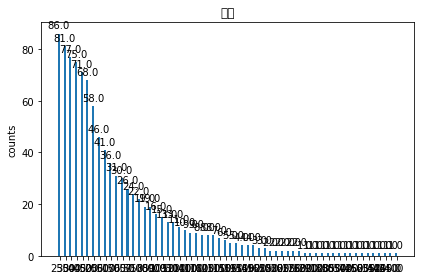

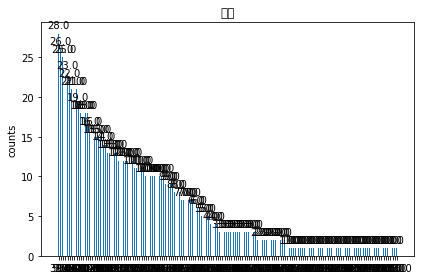

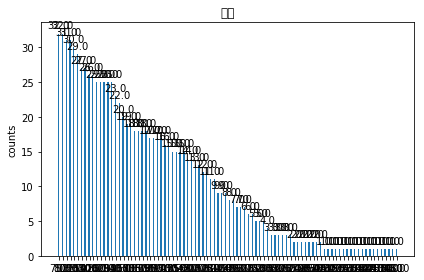

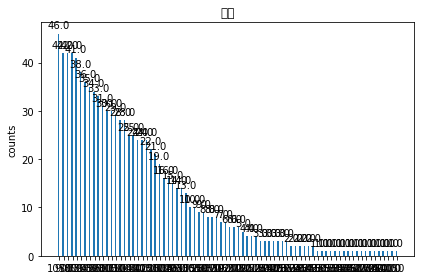

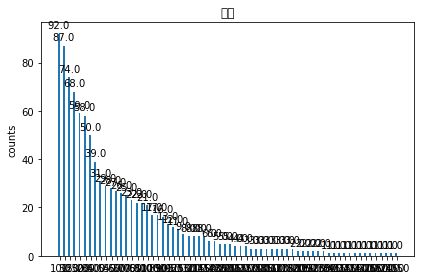

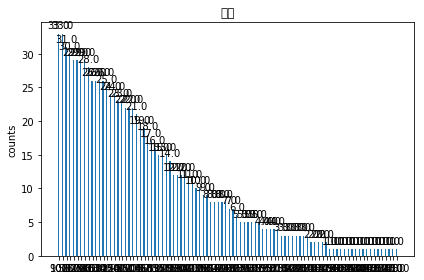

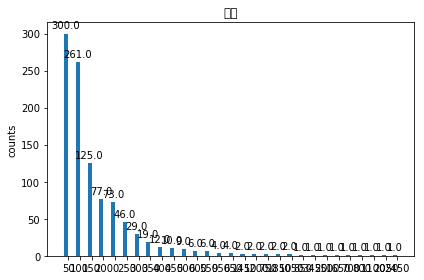

In [5]:
def draw_len_distri(df, group):
    x = dict(df['len50'].value_counts()).keys()
    y = dict(df['len50'].value_counts()).values()
    x_ = np.arange(len(x))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x_ - width/2, y, width)
    
    ax.set_ylabel('counts')
    ax.set_title(group)
    ax.set_xticks(x_)
    ax.set_xticklabels([str(i) for i in x])
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    fig.tight_layout()

    plt.show()

labels = ['时政', '房产', '财经', '科技', '时尚', '教育', '家居']
for l in labels:
    draw_len_distri(train_df[train_df['class_label'] == l], l)
    

In [41]:
import matplotlib
print(matplotlib.matplotlib_fname())

/home/david/anaconda3/envs/tf1.14py3.6/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [7]:
dict(train_df['len50'].value_counts())

{0: 117,
 50: 429,
 100: 401,
 150: 278,
 200: 265,
 250: 262,
 300: 248,
 350: 247,
 400: 218,
 450: 200,
 500: 211,
 550: 190,
 600: 177,
 650: 150,
 700: 170,
 750: 177,
 800: 147,
 850: 139,
 900: 157,
 950: 121,
 1000: 136,
 1050: 142,
 1100: 129,
 1150: 102,
 1200: 109,
 1250: 107,
 1300: 106,
 1350: 96,
 1400: 84,
 1450: 84,
 1500: 81,
 1550: 63,
 1600: 68,
 1650: 70,
 1700: 73,
 1750: 55,
 1800: 44,
 1850: 57,
 1900: 53,
 1950: 50,
 2000: 47,
 2050: 48,
 2100: 34,
 2150: 41,
 2200: 41,
 2250: 39,
 2300: 28,
 2350: 46,
 2400: 31,
 2450: 33,
 2500: 26,
 2550: 33,
 2600: 27,
 2650: 22,
 2700: 9,
 2750: 26,
 2800: 18,
 2850: 19,
 2900: 11,
 2950: 21,
 3000: 13,
 3050: 11,
 3100: 13,
 3150: 21,
 3200: 13,
 3250: 18,
 3300: 16,
 3350: 18,
 3400: 8,
 3450: 10,
 3500: 10,
 3550: 19,
 3600: 5,
 3650: 8,
 3700: 7,
 3750: 7,
 3800: 3,
 3850: 10,
 3950: 6,
 4000: 4,
 4050: 5,
 4150: 10,
 4200: 2,
 4250: 5,
 4300: 6,
 4350: 4,
 4400: 5,
 4450: 6,
 4500: 3,
 4600: 5,
 4650: 2,
 4700: 2,
 475